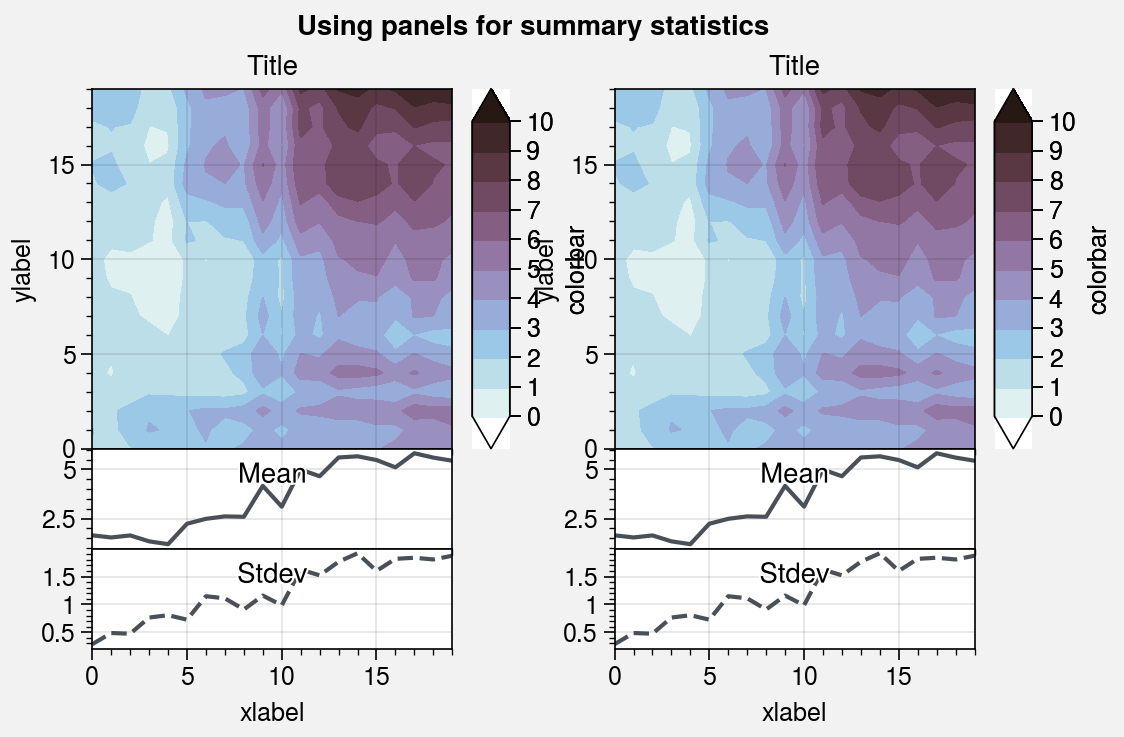

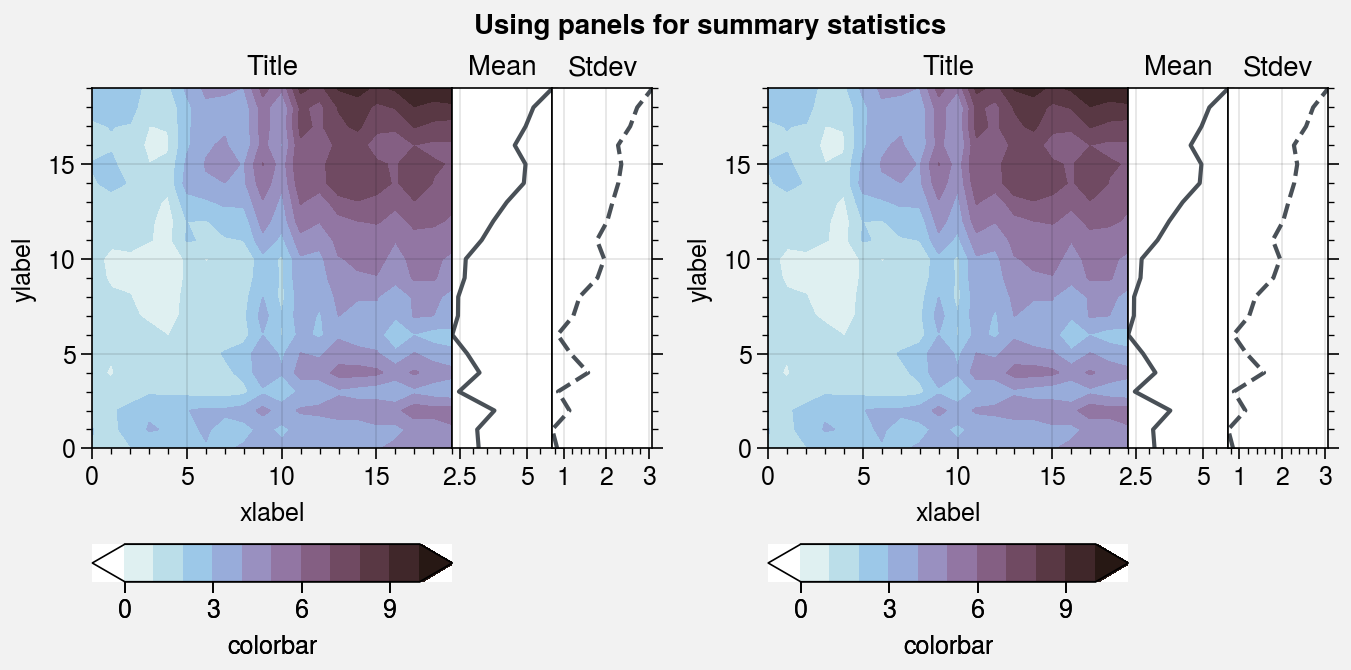

In [1]:
import proplot as pplt
import numpy as np
state = np.random.RandomState(51423)
data = (state.rand(20, 20) - 0.48).cumsum(axis=1).cumsum(axis=0)
data = 10 * (data - data.min()) / (data.max() - data.min())

# Stacked panels with outer colorbars
for cbarloc, ploc in ('rb', 'br'):
    fig, axs = pplt.subplots(
        refwidth=1.8, nrows=1, ncols=2,
        share=0, panelpad=0.1, includepanels=True
    )
    axs.format(
        xlabel='xlabel', ylabel='ylabel', title='Title',
        suptitle='Using panels for summary statistics',
    )

    # Plot 2D dataset
    axs.contourf(
        data, cmap='glacial', extend='both',
        colorbar=cbarloc, colorbar_kw={'label': 'colorbar'},
    )

    # Get summary statistics and settings
    axis = int(ploc == 'r')  # dimension along which stats are taken
    x1 = x2 = np.arange(20)
    y1 = data.mean(axis=axis)
    y2 = data.std(axis=axis)
    titleloc = 'upper center'
    if ploc == 'r':
        titleloc = 'center'
        x1, x2, y1, y2 = y1, y2, x1, x2

    # Panels for plotting the mean. We make two panels at once and plot data
    # on both panels at once by calling functions from SubplotsContainers.
    # More realistically, you would plot data on each panel one-by-one.
    space = 0
    width = '4em'
    kwargs = {'titleloc': titleloc, 'xreverse': False, 'yreverse': False}
    paxs = axs.panel(ploc, space=space, width=width)
    paxs.plot(x1, y1, color='gray7')
    paxs.format(title='Mean', **kwargs)

    # Panels for plotting the standard deviation
    paxs = axs.panel(ploc, space=space, width=width)
    paxs.plot(x2, y2, color='gray7', ls='--')
    paxs.format(title='Stdev', **kwargs)

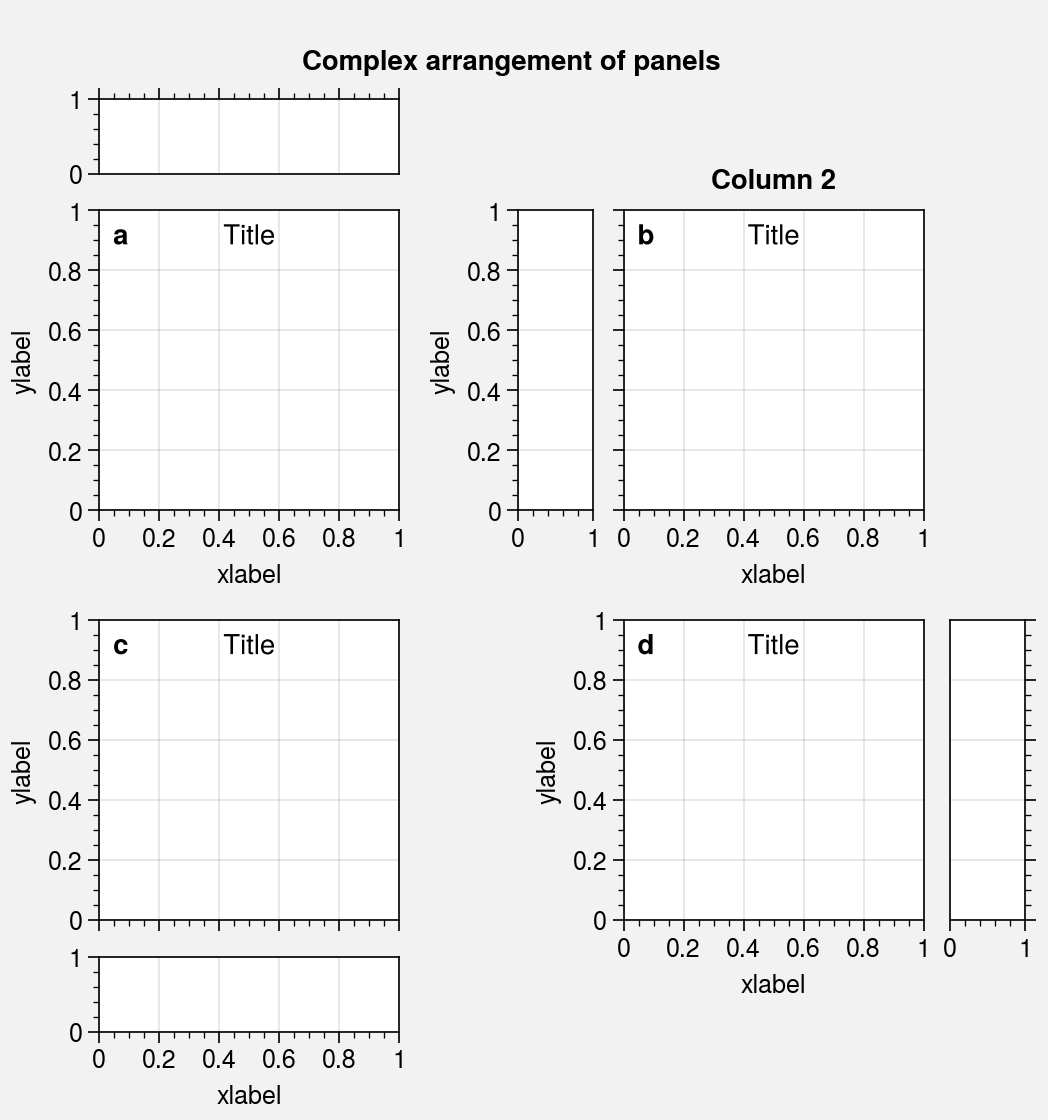

In [2]:
import proplot as pplt
fig, axs = pplt.subplots(refwidth=1.5, nrows=2, ncols=2, share=0)

# Demonstrate that complex arrangements of panels does
# not mess up subplot aspect ratios or tight layout spacing
axs.format(
    xlim=(0, 1), ylim=(0, 1),
    xlabel='xlabel', ylabel='ylabel',
    xticks=0.2, yticks=0.2,
    title='Title', suptitle='Complex arrangement of panels',
    toplabels=('Column 1', 'Column 2'),
    abc=True, abcloc='ul', titleloc='uc', titleabove=False,
)
for ax, side in zip(axs, 'tlbr'):
    ax.panel(side, width='3em')

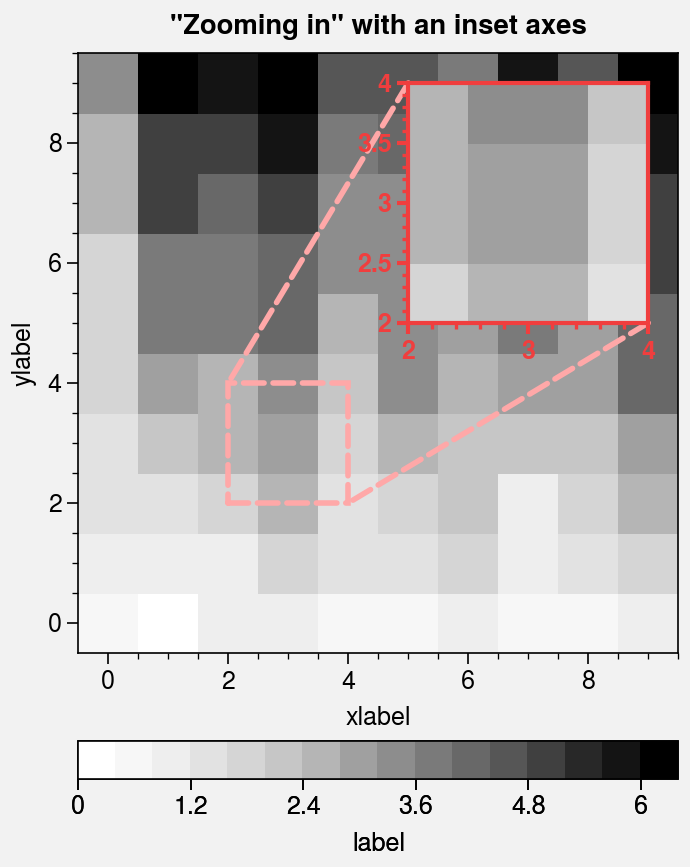

In [3]:
import proplot as pplt
import numpy as np

# Sample data
N = 20
state = np.random.RandomState(51423)
x, y = np.arange(10), np.arange(10)
data = state.rand(10, 10).cumsum(axis=0)

# Plot data
fig, ax = pplt.subplots(refwidth=3)
m = ax.pcolormesh(data, cmap='Grays', levels=N)
ax.colorbar(m, loc='b', label='label')
ax.format(
    xlabel='xlabel', ylabel='ylabel',
    suptitle='"Zooming in" with an inset axes'
)

# Create inset axes representing a "zoom-in"
iax = ax.inset(
    [5, 5, 4, 4], transform='data', zoom=True,
    zoom_kw={'color': 'red3', 'lw': 2, 'ls': '--'}
)
iax.format(
    xlim=(2, 4), ylim=(2, 4), color='red7',
    linewidth=1.5, ticklabelweight='bold'
)
iax.pcolormesh(data, cmap='Grays', levels=N, inbounds=False)